In [20]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [27]:
Stock = 'AMZN'

In [6]:
df_stock = pd.read_csv(r"AMZN.csv", low_memory=False)
print ("Data Shape: ", df_stock.shape)

Data Shape:  (251, 7)


#### Check for NaN Values

In [7]:
df_stock.isnull().values.any()

False

#### Remove NaN Values if Applicable

In [8]:
df_stock.dropna(axis=1, how='all')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-05,167.741501,168.110504,163.266006,164.054993,164.054993,53728000
1,2022-04-06,161.650497,162.199997,157.254501,158.755997,158.755997,79056000
2,2022-04-07,158.399994,160.078995,154.511505,157.784500,157.784500,68136000
3,2022-04-08,156.750000,157.368500,154.231003,154.460495,154.460495,46002000
4,2022-04-11,152.712997,154.136505,150.534500,151.121994,151.121994,52112000
...,...,...,...,...,...,...,...
246,2023-03-29,98.690002,100.419998,98.559998,100.250000,100.250000,49783300
247,2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
248,2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
249,2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700


#### Show First Few Columns

In [9]:
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-05,167.741501,168.110504,163.266006,164.054993,164.054993,53728000
1,2022-04-06,161.650497,162.199997,157.254501,158.755997,158.755997,79056000
2,2022-04-07,158.399994,160.078995,154.511505,157.784500,157.784500,68136000
3,2022-04-08,156.750000,157.368500,154.231003,154.460495,154.460495,46002000
4,2022-04-11,152.712997,154.136505,150.534500,151.121994,151.121994,52112000


#### Show Last Few Columns

In [10]:
df_stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2023-03-29,98.690002,100.419998,98.559998,100.250000,100.250000,49783300
247,2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
248,2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
249,2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700
250,2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48599900


#### Get Statistics

In [13]:
df_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,111.365902,113.288974,109.302391,111.296480,111.296480,7.359801e+07
std,18.733620,18.903238,18.390732,18.546574,18.546574,3.059969e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,3.508860e+07
25%,96.035000,97.544998,94.195000,96.259998,96.259998,5.405360e+07
50%,108.199997,112.129997,106.320000,108.859001,108.859001,6.560740e+07
75%,122.549999,124.250000,120.333748,122.384998,122.384998,8.392465e+07
max,167.741501,168.110504,163.266006,164.054993,164.054993,2.726620e+08


### Trading Strategies

In [33]:
df_stock[f"{Stock}"] = df_stock[['Open', 'Close']].mean(axis=1)  

In [23]:
df_stock['SMA30'] = df_stock['MidClose'].rolling(30).mean()  
df_stock['SMA100'] = df_stock['MidClose'].rolling(100).mean()  

Text(0.5, 0, 'Date')

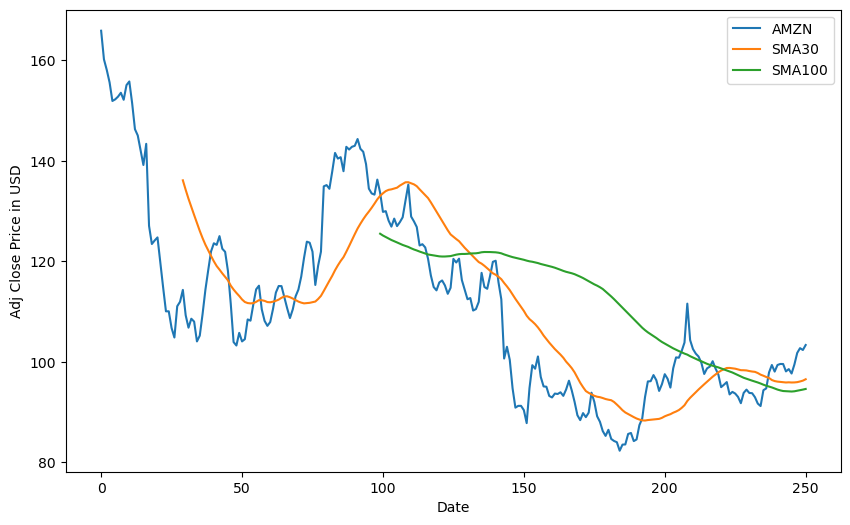

In [34]:
df_stock[[f"{Stock}", 'SMA30', 'SMA100']].plot(figsize=(10, 6))
plt.ylabel("Adj Close Price in USD")
plt.xlabel('Date')

#### Buy/Sell Function

def buy_sell(data):

    ...

    return (signal_price_buy, signal_price_sell)